# 데이터분석 - Mid Season Invitational 2021

## 1-1. 문제 정의
- LOL을 이기기 위해서는 선수들이 상대방과의 **성장세**의 격차를 벌리는 것을 바탕으로 **포탑**과 **넥서스**를 파괴해야 한다. 이를 바탕으로 승리에 영향을 미치는 요소들을 알아보려 한다.


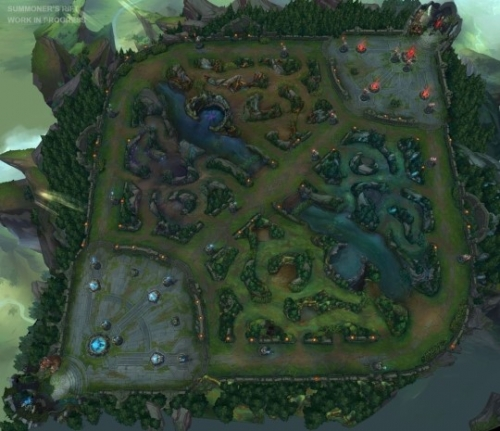

In [1]:
from IPython.display import Image
Image('https://img.etoday.co.kr/pto_db/2014/11/600/20141119032834_542370_500_431.jpg')

## 1-2. 가설 수립
    
* ### 바텀라이너의 킬 수가 더 높은 팀이 승리할 가능성이 높다.
     - 바텀라이너는 흔히 **원거리 딜러**가 배정되므로 **킬**을 많이 만들어 아이템을 빠르게 구입하여 영향력을 크게 행사하는 것이 중요하다고 알려져 있다. 일반적으로 킬 수가 많을수록 골드를 더욱 수급하여 승리에 많은 영향을 미칠 수 있다.


* ### 정글러의 15분 골드가 더 높은 팀이 승리할 가능성이 높다.

    - 정글러는 경기 시간 15분 전까지 (경기 초반부) **정글 몬스터**를 최대한 많이 처치하여 상개 정글러와 성장 격차를 벌리는 것이 중요하다. 일반적으로 정글러가 잘 성장할수록 라인전에 개입하는 것의 성공확률이 높아지고, 팀 전체적으로 이득을 볼 수 있다.


* ### 킬 수의 합이 높을수록 전체 순위도 높을 것이다.

    - 킬 수의 합이 높을수록 상대팀과의 골드 수급량 격차를 벌릴 수 있기 때문에 경기를 이길 확률이 높다.
    
    
* ### 양 팀의 평균 kda 차이가 클수록 경기가 빠르게 끝났을 것이다.

    - **kda** 의 차이가 상대방보다 클수록, 더욱 압도적으로 경기를 풀어나가기 때문에 일반적으로 경기를 빠르게 끝낼 수 있다고 알려져 있다.

* ### 킬수는 데스수와는 반비례 관계에 있고, 어시스트와는 정비례 관계에 있을 것이다.
   
    - 킬 수가 많을수록 상대방과의 성장세가 벌어지기 때문에 데스를 당할 확률도 떨어진다. 또한 프로급의 대회에서는 **킬 관여율**이 높다고 알려져 있으므로 킬과 어시스트가 함께 올라가는 경우가 많다.

## 2. 데이터 가져오기 

In [2]:
# !kaggle datasets download -d jliazhang/lolmsi2021

In [3]:
# !tar -xvf lolmsi2021.zip

## 3. 데이터 로드하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('msi_matches.xlsx')
df.head()

,Unnamed: 0,match_id,blue_team_name,red_team_name,result,duration,duration_in_sec,date,blue_top_name,blue_top_champion,...,red_bot_gd_at_15,red_sup_name,red_sup_champion,red_sup_kills,red_sup_deaths,red_sup_assists,red_sup_kda,red_sup_cs,red_sup_gd_at_15,timeline
0,0,31241,DWG KIA,Cloud9,BLUE,27:40,1660,2021-05-06,Khan,Gnar,...,826,Vulcan,Tahm Kench,0,1,5,5.000000,34,304,6:46 Mountain Drake by BLUE \ 7:11 First blood...
1,1,31242,Infinity eSports,Detonation FocusMe,BLUE,27:13,1633,2021-05-06,Buggax,Gnar,...,-660,Kazu,Rell,0,4,4,1.000000,34,-314,2:45 First blood by BLUE \ 8:47 Rift Herald by...
2,2,31243,Royal Never Give Up,Pentanet.GG,BLUE,24:12,1452,2021-05-06,xiaohu,Gnar,...,-547,Decoy,Thresh,0,4,3,0.750000,34,-29,6:06 First blood by RED \ 8:57 Rift Herald by ...
3,3,31244,Pentanet.GG,Unicorns Of Love,RED,28:46,1726,2021-05-06,BioPanther,Ornn,...,-629,SaNTaS,Alistar,0,0,6,9999.000000,38,-410,8:48 Rift Herald by RED \ 9:01 First blood by ...
4,4,31245,Istanbul Wildcats,paiN Gaming,RED,38:19,2299,2021-05-06,StarScreen,Sett,...,-2388,Luci,Rell,1,7,15,2.285714,34,-468,2:15 First blood by BLUE \ 10:06 Rift Herald b...


## 4. 데이터 살펴보기

In [6]:
df.columns

Index(['Unnamed: 0', 'match_id', 'blue_team_name', 'red_team_name', 'result',
       'duration', 'duration_in_sec', 'date', 'blue_top_name',
       'blue_top_champion', 'blue_top_kills', 'blue_top_deaths',
       'blue_top_assists', 'blue_top_kda', 'blue_top_cs', 'blue_top_gd_at_15',
       'blue_jg_name', 'blue_jg_champion', 'blue_jg_kills', 'blue_jg_deaths',
       'blue_jg_assists', 'blue_jg_kda', 'blue_jg_cs', 'blue_jg_gd_at_15',
       'blue_mid_name', 'blue_mid_champion', 'blue_mid_kills',
       'blue_mid_deaths', 'blue_mid_assists', 'blue_mid_kda', 'blue_mid_cs',
       'blue_mid_gd_at_15', 'blue_bot_name', 'blue_bot_champion',
       'blue_bot_kills', 'blue_bot_deaths', 'blue_bot_assists', 'blue_bot_kda',
       'blue_bot_cs', 'blue_bot_gd_at_15', 'blue_sup_name',
       'blue_sup_champion', 'blue_sup_kills', 'blue_sup_deaths',
       'blue_sup_assists', 'blue_sup_kda', 'blue_sup_cs', 'blue_sup_gd_at_15',
       'red_top_name', 'red_top_champion', 'red_top_kills', 'red_top_dea

In [7]:
df.shape

(54, 89)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         54 non-null     int64  
 1   match_id           54 non-null     int64  
 2   blue_team_name     54 non-null     object 
 3   red_team_name      54 non-null     object 
 4   result             54 non-null     object 
 5   duration           54 non-null     object 
 6   duration_in_sec    54 non-null     int64  
 7   date               54 non-null     object 
 8   blue_top_name      54 non-null     object 
 9   blue_top_champion  54 non-null     object 
 10  blue_top_kills     54 non-null     int64  
 11  blue_top_deaths    54 non-null     int64  
 12  blue_top_assists   54 non-null     int64  
 13  blue_top_kda       54 non-null     float64
 14  blue_top_cs        54 non-null     int64  
 15  blue_top_gd_at_15  54 non-null     int64  
 16  blue_jg_name       54 non-nu

In [9]:
df.describe()

,Unnamed: 0,match_id,duration_in_sec,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_top_cs,blue_top_gd_at_15,blue_jg_kills,...,red_bot_assists,red_bot_kda,red_bot_cs,red_bot_gd_at_15,red_sup_kills,red_sup_deaths,red_sup_assists,red_sup_kda,red_sup_cs,red_sup_gd_at_15
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,31270.166667,1770.314815,3.203704,2.833333,5.055556,1114.255624,234.148148,148.425926,2.759259,...,4.462963,1855.196958,271.851852,-67.611111,0.740741,3.592593,7.870370,558.846951,35.203704,-67.907407
std,15.732133,17.321325,320.104513,2.543060,2.035070,3.466370,3170.729122,51.247239,1175.061646,2.338643,...,3.396519,3918.863318,64.384871,1438.384293,0.894115,2.343345,5.313018,2311.075014,8.196593,673.259300
min,0.000000,31241.000000,1112.000000,0.000000,0.000000,0.000000,0.166667,119.000000,-3242.000000,0.000000,...,0.000000,0.000000,137.000000,-3350.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-1887.000000
25%,13.250000,31254.250000,1573.500000,1.250000,2.000000,2.000000,1.375000,199.000000,-478.750000,1.000000,...,2.000000,1.375000,226.750000,-834.250000,0.000000,2.000000,4.000000,1.000000,32.000000,-357.750000
50%,26.500000,31271.500000,1727.500000,3.000000,3.000000,4.500000,2.416667,231.500000,104.500000,2.500000,...,4.000000,3.625000,270.500000,149.500000,1.000000,3.000000,6.000000,2.416667,34.000000,-127.500000
75%,39.750000,31284.750000,1916.250000,4.750000,3.750000,8.000000,7.375000,266.000000,942.500000,4.000000,...,6.000000,11.750000,311.500000,950.500000,1.000000,5.000000,12.000000,5.458333,39.750000,369.000000
max,53.000000,31298.000000,2670.000000,11.000000,11.000000,12.000000,9999.000000,337.000000,2882.000000,10.000000,...,14.000000,9999.000000,437.000000,2685.000000,4.000000,11.000000,19.000000,9999.000000,59.000000,994.000000


In [10]:
# 팀 보기
df.blue_team_name.value_counts() + df.red_team_name.value_counts()
team_list = (df.blue_team_name.value_counts() + df.red_team_name.value_counts()).index
team_list

Index(['Cloud9', 'DWG KIA', 'Detonation FocusMe', 'Infinity eSports',
       'Istanbul Wildcats', 'MAD Lions', 'PSG Talon', 'Pentanet.GG',
       'Royal Never Give Up', 'Unicorns Of Love', 'paiN Gaming'],
      dtype='object')

## 5. 데이터 전처리

In [11]:
# 불필요한 컬럼 삭제
df.drop(['Unnamed: 0', 'match_id', 'duration_in_sec', 'date', 'blue_top_name',
       'blue_top_champion', 'blue_top_cs', 'blue_top_gd_at_15',
       'blue_jg_name', 'blue_jg_champion','blue_jg_cs',
       'blue_mid_name', 'blue_mid_champion',
       'blue_mid_cs',
       'blue_mid_gd_at_15', 'blue_bot_name', 'blue_bot_champion',
       'blue_bot_cs', 'blue_bot_gd_at_15', 'blue_sup_name',
       'blue_sup_champion', 'blue_sup_cs', 'blue_sup_gd_at_15',
       'red_top_name', 'red_top_champion', 'red_top_cs', 'red_top_gd_at_15',
       'red_jg_name', 'red_jg_champion','red_jg_cs',
       'red_mid_name', 'red_mid_champion', 'red_mid_cs', 'red_mid_gd_at_15',
       'red_bot_name', 'red_bot_champion', 'red_bot_cs', 'red_bot_gd_at_15',
       'red_sup_name', 'red_sup_champion', 'red_sup_cs', 'red_sup_gd_at_15',
       'timeline'], axis = 1, inplace = True)
df.head()

,blue_team_name,red_team_name,result,duration,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_jg_kills,blue_jg_deaths,...,red_mid_assists,red_mid_kda,red_bot_kills,red_bot_deaths,red_bot_assists,red_bot_kda,red_sup_kills,red_sup_deaths,red_sup_assists,red_sup_kda
0,DWG KIA,Cloud9,BLUE,27:40,3,0,5,9999.000000,2,2,...,2,2.00,3,2,2,2.5,0,1,5,5.000000
1,Infinity eSports,Detonation FocusMe,BLUE,27:13,3,3,4,2.333333,3,2,...,3,1.25,2,2,1,1.5,0,4,4,1.000000
2,Royal Never Give Up,Pentanet.GG,BLUE,24:12,5,0,10,9999.000000,6,1,...,1,0.80,0,5,2,0.4,0,4,3,0.750000
3,Pentanet.GG,Unicorns Of Love,RED,28:46,0,2,1,0.500000,0,4,...,5,9.00,3,0,4,9999.0,0,0,6,9999.000000
4,Istanbul Wildcats,paiN Gaming,RED,38:19,7,6,3,1.666667,4,4,...,6,13.00,2,5,8,2.0,1,7,15,2.285714


In [12]:
# 매치별 블루팀의 킬 수, 죽음 수, 도움 수 합 컬럼 만들기
df['blue_total_kills'] = df['blue_top_kills'] + df['blue_jg_kills'] + df['blue_mid_kills'] + df['blue_bot_kills'] + df['blue_sup_kills']
df['blue_total_deaths'] = df['blue_top_deaths'] + df['blue_jg_deaths'] + df['blue_mid_deaths'] + df['blue_bot_deaths'] + df['blue_sup_deaths']
df['blue_total_assists'] = df['blue_top_assists'] + df['blue_jg_assists'] + df['blue_mid_assists'] + df['blue_bot_assists'] + df['blue_sup_assists']

df['blue_total_kills'].head(), df['blue_total_deaths'].head(), df['blue_total_assists'].head()

(0    10
 1    13
 2    21
 3     1
 4    22
 Name: blue_total_kills, dtype: int64,
 0     7
 1     8
 2     4
 3    11
 4    21
 Name: blue_total_deaths, dtype: int64,
 0    23
 1    32
 2    49
 3     2
 4    43
 Name: blue_total_assists, dtype: int64)

In [13]:
# 매치별 레드팀의 킬 수, 죽음 수, 도움 수 합 컬럼 만들기
df['red_total_kills'] = df['red_top_kills'] + df['red_jg_kills'] + df['red_mid_kills'] + df['red_bot_kills'] + df['red_sup_kills']
df['red_total_deaths'] = df['red_top_deaths'] + df['red_jg_deaths'] + df['red_mid_deaths'] + df['red_bot_deaths'] + df['red_sup_deaths']
df['red_total_assists'] = df['red_top_assists'] + df['red_jg_assists'] + df['red_mid_assists'] + df['red_bot_assists'] + df['red_sup_assists']

df['red_total_kills'].head(), df['red_total_deaths'].head(), df['red_total_assists'].head()

(0     7
 1     8
 2     4
 3    11
 4    21
 Name: red_total_kills, dtype: int64,
 0    10
 1    13
 2    21
 3     1
 4    22
 Name: red_total_deaths, dtype: int64,
 0    15
 1    15
 2    10
 3    24
 4    52
 Name: red_total_assists, dtype: int64)

In [14]:
df.head()

,blue_team_name,red_team_name,result,duration,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_jg_kills,blue_jg_deaths,...,red_sup_kills,red_sup_deaths,red_sup_assists,red_sup_kda,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists
0,DWG KIA,Cloud9,BLUE,27:40,3,0,5,9999.000000,2,2,...,0,1,5,5.000000,10,7,23,7,10,15
1,Infinity eSports,Detonation FocusMe,BLUE,27:13,3,3,4,2.333333,3,2,...,0,4,4,1.000000,13,8,32,8,13,15
2,Royal Never Give Up,Pentanet.GG,BLUE,24:12,5,0,10,9999.000000,6,1,...,0,4,3,0.750000,21,4,49,4,21,10
3,Pentanet.GG,Unicorns Of Love,RED,28:46,0,2,1,0.500000,0,4,...,0,0,6,9999.000000,1,11,2,11,1,24
4,Istanbul Wildcats,paiN Gaming,RED,38:19,7,6,3,1.666667,4,4,...,1,7,15,2.285714,22,21,43,21,22,52


In [15]:
# 경기별 각 팀들의 평균 KDA 구하기
# 각 선수별의 KDA의 평균치를 내면 정확한 값을 낼 수 없다. (가령 KDA가 무한이 큰 수일수도 있다.) 따라서 경기별 각 팀들의 킬 + 도움수를 죽음수로 나누어 구한다.
df['blue_match_kda'] = (df['blue_total_kills'] + df['blue_total_assists']) / df['blue_total_deaths']
df['red_match_kda'] = (df['red_total_kills'] + df['red_total_assists']) / df['red_total_deaths']
df['blue_match_kda'].head(), df['red_match_kda'].head()

(0     4.714286
 1     5.625000
 2    17.500000
 3     0.272727
 4     3.095238
 Name: blue_match_kda, dtype: float64,
 0     2.200000
 1     1.769231
 2     0.666667
 3    35.000000
 4     3.318182
 Name: red_match_kda, dtype: float64)

In [16]:
# 경기별 각 팀의 KDA 차이 구하기
df['diff_match_kda'] = abs(df['blue_match_kda'] - df['red_match_kda'])
df['diff_match_kda'].head()

0     2.514286
1     3.855769
2    16.833333
3    34.727273
4     0.222944
Name: diff_match_kda, dtype: float64

In [17]:
# 각 팀들의 전체 킬 수 합 구하기
team_kills = df.groupby('blue_team_name')['blue_total_kills'].sum() + df.groupby(['red_team_name'])['red_total_kills'].sum()
team_kills.sort_values(ascending = False)

blue_team_name
Royal Never Give Up    277
MAD Lions              186
PSG Talon              176
Cloud9                 170
DWG KIA                167
Pentanet.GG            137
Istanbul Wildcats       91
Detonation FocusMe      72
Unicorns Of Love        71
paiN Gaming             68
Infinity eSports        52
dtype: int64

In [18]:
# 매치 승 결과값 바꾸기
df['win'] = np.NaN
for i in df.index:
    whether = df.loc[i, ['blue_team_name', 'red_team_name', 'result']] 
    if whether['result'] == 'BLUE':
        df.loc[i, 'win'] = whether['blue_team_name']
    elif whether['result'] == 'RED':
        df.loc[i, 'win'] = whether['red_team_name']
df.head()

,blue_team_name,red_team_name,result,duration,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_jg_kills,blue_jg_deaths,...,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists,blue_match_kda,red_match_kda,diff_match_kda,win
0,DWG KIA,Cloud9,BLUE,27:40,3,0,5,9999.000000,2,2,...,10,7,23,7,10,15,4.714286,2.200000,2.514286,DWG KIA
1,Infinity eSports,Detonation FocusMe,BLUE,27:13,3,3,4,2.333333,3,2,...,13,8,32,8,13,15,5.625000,1.769231,3.855769,Infinity eSports
2,Royal Never Give Up,Pentanet.GG,BLUE,24:12,5,0,10,9999.000000,6,1,...,21,4,49,4,21,10,17.500000,0.666667,16.833333,Royal Never Give Up
3,Pentanet.GG,Unicorns Of Love,RED,28:46,0,2,1,0.500000,0,4,...,1,11,2,11,1,24,0.272727,35.000000,34.727273,Unicorns Of Love
4,Istanbul Wildcats,paiN Gaming,RED,38:19,7,6,3,1.666667,4,4,...,22,21,43,21,22,52,3.095238,3.318182,0.222944,paiN Gaming


In [19]:
# 매치 패 결과 구하기
df['lose'] = np.NaN
for i in df.index: 
    if df.loc[i, 'win'] == df.loc[i, 'blue_team_name']:
        df.loc[i, 'lose'] = df.loc[i, 'red_team_name']
    elif df.loc[i, 'win'] == df.loc[i, 'red_team_name']:
        df.loc[i, 'lose'] = df.loc[i, 'blue_team_name']
df.head()

,blue_team_name,red_team_name,result,duration,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_jg_kills,blue_jg_deaths,...,blue_total_deaths,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists,blue_match_kda,red_match_kda,diff_match_kda,win,lose
0,DWG KIA,Cloud9,BLUE,27:40,3,0,5,9999.000000,2,2,...,7,23,7,10,15,4.714286,2.200000,2.514286,DWG KIA,Cloud9
1,Infinity eSports,Detonation FocusMe,BLUE,27:13,3,3,4,2.333333,3,2,...,8,32,8,13,15,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe
2,Royal Never Give Up,Pentanet.GG,BLUE,24:12,5,0,10,9999.000000,6,1,...,4,49,4,21,10,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG
3,Pentanet.GG,Unicorns Of Love,RED,28:46,0,2,1,0.500000,0,4,...,11,2,11,1,24,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG
4,Istanbul Wildcats,paiN Gaming,RED,38:19,7,6,3,1.666667,4,4,...,21,43,21,22,52,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats


In [20]:
# 패배 결과값 구하기
map_ = {'BLUE':'RED', 'RED':'BLUE'}
df['result_lose'] = df['result'].map(map_)
df.head()

,blue_team_name,red_team_name,result,duration,blue_top_kills,blue_top_deaths,blue_top_assists,blue_top_kda,blue_jg_kills,blue_jg_deaths,...,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists,blue_match_kda,red_match_kda,diff_match_kda,win,lose,result_lose
0,DWG KIA,Cloud9,BLUE,27:40,3,0,5,9999.000000,2,2,...,23,7,10,15,4.714286,2.200000,2.514286,DWG KIA,Cloud9,RED
1,Infinity eSports,Detonation FocusMe,BLUE,27:13,3,3,4,2.333333,3,2,...,32,8,13,15,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe,RED
2,Royal Never Give Up,Pentanet.GG,BLUE,24:12,5,0,10,9999.000000,6,1,...,49,4,21,10,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG,RED
3,Pentanet.GG,Unicorns Of Love,RED,28:46,0,2,1,0.500000,0,4,...,2,11,1,24,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG,BLUE
4,Istanbul Wildcats,paiN Gaming,RED,38:19,7,6,3,1.666667,4,4,...,43,21,22,52,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats,BLUE


In [21]:
# 각 팀의 승률 및 승률에 따른 순위 구하기
rank = (df['win'].value_counts() / (df['win'].value_counts() + df['lose'].value_counts()) * 100).sort_values(ascending = False)
df2 = rank.reset_index()
df2.columns = ['team_name', 'win_rate']
df2.index.name = 'rank'
df2.index = df2.index + 1
df2

,team_name,win_rate
rank,,
1,Royal Never Give Up,92.857143
2,DWG KIA,83.333333
3,MAD Lions,72.727273
4,PSG Talon,63.636364
5,Cloud9,41.666667
6,paiN Gaming,33.333333
7,Detonation FocusMe,33.333333
8,Unicorns Of Love,22.222222
9,Pentanet.GG,20.000000


In [22]:
# EDA에 필요없는 컬럼 삭제
df.drop(['blue_team_name', 'red_team_name',
       'blue_top_kills', 'blue_top_deaths', 'blue_top_assists', 'blue_top_kda',
       'blue_jg_kills', 'blue_jg_deaths', 'blue_jg_assists', 'blue_jg_kda',
       'blue_mid_kills', 'blue_mid_deaths',
       'blue_mid_assists', 'blue_mid_kda', 'blue_bot_deaths',
       'blue_bot_assists', 'blue_bot_kda', 'blue_sup_kills', 'blue_sup_deaths',
       'blue_sup_assists', 'blue_sup_kda', 'red_top_kills', 'red_top_deaths',
       'red_top_assists', 'red_top_kda', 'red_jg_kills', 'red_jg_deaths',
       'red_jg_assists', 'red_jg_kda', 'red_mid_kills',
       'red_mid_deaths', 'red_mid_assists', 'red_mid_kda',
       'red_bot_deaths', 'red_bot_assists', 'red_bot_kda', 'red_sup_kills',
       'red_sup_deaths', 'red_sup_assists', 'red_sup_kda'], axis = 1, inplace = True)
df.head()

,result,duration,blue_jg_gd_at_15,blue_bot_kills,red_jg_gd_at_15,red_bot_kills,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists,blue_match_kda,red_match_kda,diff_match_kda,win,lose,result_lose
0,BLUE,27:40,656,5,-656,3,10,7,23,7,10,15,4.714286,2.200000,2.514286,DWG KIA,Cloud9,RED
1,BLUE,27:13,-108,1,108,2,13,8,32,8,13,15,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe,RED
2,BLUE,24:12,987,5,-987,0,21,4,49,4,21,10,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG,RED
3,RED,28:46,-1257,1,1257,3,1,11,2,11,1,24,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG,BLUE
4,RED,38:19,121,8,-121,2,22,21,43,21,22,52,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats,BLUE


## 6. EDA (탐색적 데이터 분석)

### 1. 바텀라이너의 킬 수 분석

In [23]:
df.describe()[['blue_bot_kills', 'red_bot_kills']]

,blue_bot_kills,red_bot_kills
count,54.000000,54.000000
mean,4.240741,3.888889
std,3.101644,3.271758
min,0.000000,0.000000
25%,2.000000,1.000000
50%,4.000000,3.000000
75%,6.750000,6.000000
max,11.000000,11.000000


In [24]:
# 승패 결과에 따른 바텀라이너 킬 수 분석
df['win_bot_kills'] = np.NaN
for i in df.index:
    if df.loc[i, 'result'] == 'BLUE':
        df.loc[i, 'win_bot_kills'] = df.loc[i, 'blue_bot_kills']
    elif df.loc[i, 'result'] == 'RED':
        df.loc[i, 'win_bot_kills'] = df.loc[i, 'red_bot_kills']
        
df['lose_bot_kills'] = np.NaN
for i in df.index:
    if df.loc[i, 'result'] == 'BLUE':
        df.loc[i, 'lose_bot_kills'] = df.loc[i, 'red_bot_kills']
    elif df.loc[i, 'result'] == 'RED':
        df.loc[i, 'lose_bot_kills'] = df.loc[i, 'blue_bot_kills']
df.head()

,result,duration,blue_jg_gd_at_15,blue_bot_kills,red_jg_gd_at_15,red_bot_kills,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,red_total_deaths,red_total_assists,blue_match_kda,red_match_kda,diff_match_kda,win,lose,result_lose,win_bot_kills,lose_bot_kills
0,BLUE,27:40,656,5,-656,3,10,7,23,7,10,15,4.714286,2.200000,2.514286,DWG KIA,Cloud9,RED,5.0,3.0
1,BLUE,27:13,-108,1,108,2,13,8,32,8,13,15,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe,RED,1.0,2.0
2,BLUE,24:12,987,5,-987,0,21,4,49,4,21,10,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG,RED,5.0,0.0
3,RED,28:46,-1257,1,1257,3,1,11,2,11,1,24,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG,BLUE,3.0,1.0
4,RED,38:19,121,8,-121,2,22,21,43,21,22,52,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats,BLUE,2.0,8.0


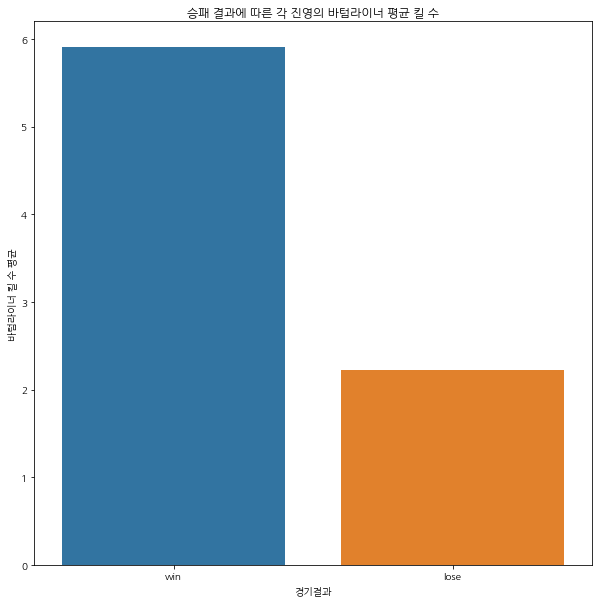

In [25]:
# 시각화
plt.figure(figsize = (10, 10))
plt.title('승패 결과에 따른 각 진영의 바텀라이너 평균 킬 수')
data = [df['win_bot_kills'].mean(), df['lose_bot_kills'].mean()]
index = ['win', 'lose']
sns.barplot(x = index, y = data)
plt.xlabel('경기결과')
plt.ylabel('바텀라이너 킬 수 평균')
plt.show()

이겼을 때 바텀라이너 평균 킬 수가 진 경우보다 높으므로 가설이 성립한다고 볼 수 있다.

### 2. 정글러의 15분 골드 차이 분석

In [26]:
df.describe()[['blue_jg_gd_at_15', 'red_jg_gd_at_15']]

,blue_jg_gd_at_15,red_jg_gd_at_15
count,54.000000,54.000000
mean,25.870370,-25.870370
std,1084.410457,1084.410457
min,-2976.000000,-2296.000000
25%,-536.000000,-748.250000
50%,4.000000,-4.000000
75%,748.250000,536.000000
max,2296.000000,2976.000000


In [27]:
# 승패 결과에 따른 정글러 15분 골드 차 분석
df['win_jg_gd_at_15'] = np.NaN
for i in df.index:
    if df.loc[i, 'result'] == 'BLUE':
        df.loc[i, 'win_jg_gd_at_15'] = df.loc[i, 'blue_jg_gd_at_15']
    elif df.loc[i, 'result'] == 'RED':
        df.loc[i, 'win_jg_gd_at_15'] = df.loc[i, 'red_jg_gd_at_15']
        
df['lose_jg_gd_at_15'] = np.NaN
for i in df.index:
    if df.loc[i, 'result'] == 'BLUE':
        df.loc[i, 'lose_jg_gd_at_15'] = df.loc[i, 'red_jg_gd_at_15']
    elif df.loc[i, 'result'] == 'RED':
        df.loc[i, 'lose_jg_gd_at_15'] = df.loc[i, 'blue_jg_gd_at_15']
df.head()

,result,duration,blue_jg_gd_at_15,blue_bot_kills,red_jg_gd_at_15,red_bot_kills,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,...,blue_match_kda,red_match_kda,diff_match_kda,win,lose,result_lose,win_bot_kills,lose_bot_kills,win_jg_gd_at_15,lose_jg_gd_at_15
0,BLUE,27:40,656,5,-656,3,10,7,23,7,...,4.714286,2.200000,2.514286,DWG KIA,Cloud9,RED,5.0,3.0,656.0,-656.0
1,BLUE,27:13,-108,1,108,2,13,8,32,8,...,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe,RED,1.0,2.0,-108.0,108.0
2,BLUE,24:12,987,5,-987,0,21,4,49,4,...,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG,RED,5.0,0.0,987.0,-987.0
3,RED,28:46,-1257,1,1257,3,1,11,2,11,...,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG,BLUE,3.0,1.0,1257.0,-1257.0
4,RED,38:19,121,8,-121,2,22,21,43,21,...,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats,BLUE,2.0,8.0,-121.0,121.0


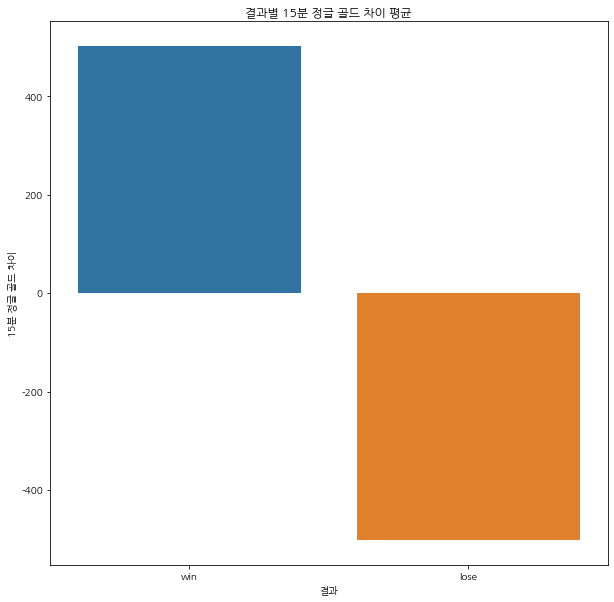

In [28]:
# 시각화
plt.figure(figsize = (10, 10))
plt.rcParams['axes.unicode_minus'] = False
data = [df['win_jg_gd_at_15'].mean(), df['lose_jg_gd_at_15'].mean()]
index = ['win', 'lose']
sns.barplot(x = index, y = data)
plt.xlabel('결과')
plt.ylabel('15분 정글 골드 차이')
plt.title('결과별 15분 정글 골드 차이 평균')
plt.show()

이긴팀의 정글러 15분 골드차가 진 팀보다 평균 450가량 높다. 따라서 가설이 성립한다고 볼 수 있다.

### 3. 킬 수와 순위의 상관관계 분석

In [29]:
# 각 팀별 전체 킬수를 데이터프레임으로 나타내기
team_kills.index.name = 'team_name'
df3_ = pd.DataFrame(team_kills, columns = ['total_kills'])
df3 = df3_.reset_index()
df3.index = df3.index + 1
df3

,team_name,total_kills
1,Cloud9,170
2,DWG KIA,167
3,Detonation FocusMe,72
4,Infinity eSports,52
5,Istanbul Wildcats,91
6,MAD Lions,186
7,PSG Talon,176
8,Pentanet.GG,137
9,Royal Never Give Up,277
10,Unicorns Of Love,71


In [30]:
# 순위 데이터프레임과 병합
df4 = pd.merge(df2, df3, on = 'team_name')
df4

,team_name,win_rate,total_kills
0,Royal Never Give Up,92.857143,277
1,DWG KIA,83.333333,167
2,MAD Lions,72.727273,186
3,PSG Talon,63.636364,176
4,Cloud9,41.666667,170
5,paiN Gaming,33.333333,68
6,Detonation FocusMe,33.333333,72
7,Unicorns Of Love,22.222222,71
8,Pentanet.GG,20.000000,137
9,Istanbul Wildcats,16.666667,91


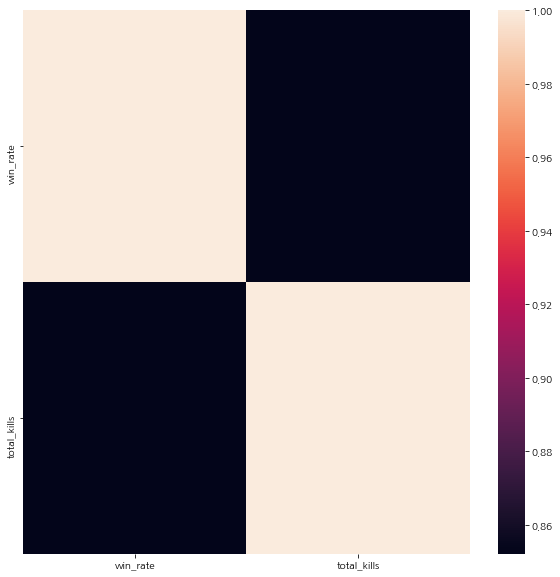

In [31]:
# 시각화
plt.figure(figsize = (10, 10))
sns.heatmap(df4.corr())
plt.show()

킬수의 합과 승률의 상관관계는 약 0.86이므로 상당히 강한 상관관계를 가졌다고 할 수 있다. 따라서 가설이 성립한다고 볼 수 있다.

### 4. KDA 차이와 경기시간의 상관관계 분석

In [32]:
# duration 컬럼 자료형 바꾸기
def to_int(x):
    return x[:2] + x[3:]
df['duration'] = df['duration'].apply(to_int)
df['duration'] = df['duration'].astype(int)
df.head()

,result,duration,blue_jg_gd_at_15,blue_bot_kills,red_jg_gd_at_15,red_bot_kills,blue_total_kills,blue_total_deaths,blue_total_assists,red_total_kills,...,blue_match_kda,red_match_kda,diff_match_kda,win,lose,result_lose,win_bot_kills,lose_bot_kills,win_jg_gd_at_15,lose_jg_gd_at_15
0,BLUE,2740,656,5,-656,3,10,7,23,7,...,4.714286,2.200000,2.514286,DWG KIA,Cloud9,RED,5.0,3.0,656.0,-656.0
1,BLUE,2713,-108,1,108,2,13,8,32,8,...,5.625000,1.769231,3.855769,Infinity eSports,Detonation FocusMe,RED,1.0,2.0,-108.0,108.0
2,BLUE,2412,987,5,-987,0,21,4,49,4,...,17.500000,0.666667,16.833333,Royal Never Give Up,Pentanet.GG,RED,5.0,0.0,987.0,-987.0
3,RED,2846,-1257,1,1257,3,1,11,2,11,...,0.272727,35.000000,34.727273,Unicorns Of Love,Pentanet.GG,BLUE,3.0,1.0,1257.0,-1257.0
4,RED,3819,121,8,-121,2,22,21,43,21,...,3.095238,3.318182,0.222944,paiN Gaming,Istanbul Wildcats,BLUE,2.0,8.0,-121.0,121.0


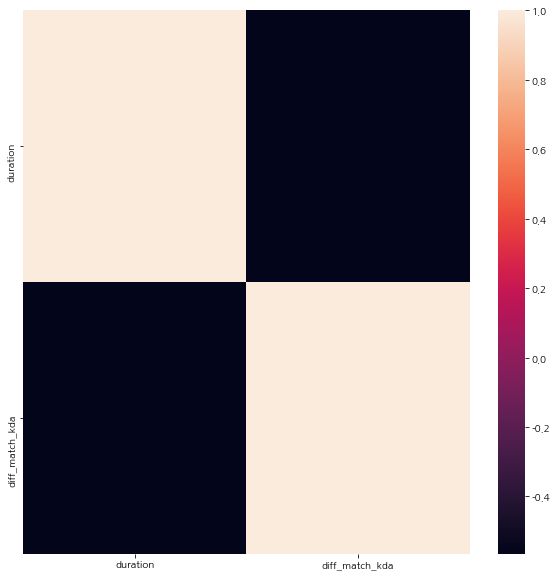

In [33]:
# 평균 KDA와 경기시간의 상관관계 분석
plt.figure(figsize = (10, 10))
sns.heatmap(df[['duration', 'diff_match_kda']].corr())
plt.show()

평균 KDA와 경기시간의 상관관계 분석결과 -0.4정도의 그렇게 강하지 않은 관계가 있다고 나온다. 따라서 가설이 언제나 성립한다고 볼 수 없다.

### 5. 킬 / 데스 / 어시스트의 상관관계 분석

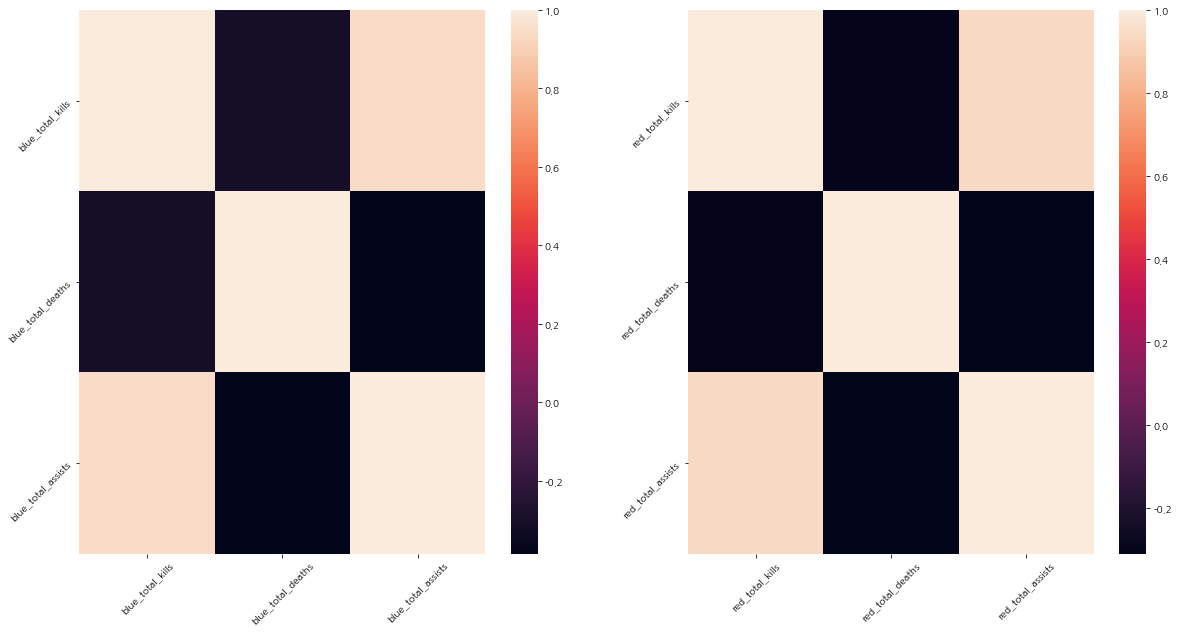

In [34]:
# 시각화
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(df[['blue_total_kills', 'blue_total_deaths', 'blue_total_assists']].corr())
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.subplot(1, 2, 2)
sns.heatmap(df[['red_total_kills', 'red_total_deaths', 'red_total_assists']].corr())
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

분석결과 킬과 데스와의 상관관계는 약 -0.2정도로 약한 상관관계를 보이므로 반비례 관계에 있다고 할 수 없는 반면, 킬과 어시스트와의 상관관계는 0.8이상으로 정비례한다고 볼 수 있다.